# Interview Success Prediction Challenge
- Goal: Predict whether a candidate will pass an interview.
- Data: https://www.kaggle.com/datasets/vingkan/strategeion-resume-skills
- Type: Binary Classififaction
> **Note**: This is a synthetic dataset.

Intuition about eigenvectors and PCA: https://towardsdatascience.com/eigenvalues-and-eigenvectors-378e851bf372

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*V4H3Cu8qGr_90WANKSO9BA.gif)

## Imports and Constants

In [1]:
# Add magic command to delete all saved variables

In [2]:
# Imports and constant values here

## Get the data

In [4]:
# Load and display the `resumes_development.csv` file from the GitHub repo.

,Unnamed: 0,Interview,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,...,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
615,620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0
616,621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
617,622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0


## Exploratory Data Analysis

Since this is a synthetic dataset, we should not draw conclusions when exploring it.

In [5]:
# Display a summary of the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 224 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Unnamed: 0                        619 non-null    int64  
 1    Interview                         619 non-null    float64
 2    Adobe Illustrator                 619 non-null    float64
 3    Adobe Photoshop                   619 non-null    float64
 4    Agile Methodologies               619 non-null    float64
 5    Analytical Skills                 619 non-null    float64
 6    Art                               619 non-null    float64
 7    Art Direction                     619 non-null    float64
 8    Auditing                          619 non-null    float64
 9    AutoCAD                           619 non-null    float64
 10   Automation                        619 non-null    float64
 11   Automotive                        619 non-null    float6

In [ ]:
# Display summary statistics.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,619.0,312.812601,180.291360,0.0,156.5,314.0,468.5,623.0
Interview,619.0,0.353796,0.478534,0.0,0.0,0.0,1.0,1.0
Adobe Illustrator,619.0,0.017771,0.132223,0.0,0.0,0.0,0.0,1.0
Adobe Photoshop,619.0,0.027464,0.163562,0.0,0.0,0.0,0.0,1.0
Agile Methodologies,619.0,0.116317,0.320864,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
Writing,619.0,0.030695,0.172629,0.0,0.0,0.0,0.0,1.0
Veteran,619.0,0.408724,0.491996,0.0,0.0,0.0,1.0,1.0
Female,619.0,0.521809,0.499928,0.0,0.0,1.0,1.0,1.0
URM,619.0,0.494346,0.500372,0.0,0.0,0.0,1.0,1.0


In [7]:
# How many missing values are there in the whole dataframe?

0.0

In [8]:
# What is the distribution of the Interview feature.

Interview
0.0    400
1.0    219
Name: count, dtype: int64

In [9]:
# Print the number of unique values in each feature and if that number is less than 15, print the values.

Unnamed: 0                               |   619 | 
Interview                                |     2 | [1. 0.]
Adobe Illustrator                        |     2 | [0. 1.]
Adobe Photoshop                          |     2 | [0. 1.]
Agile Methodologies                      |     2 | [1. 0.]
Analytical Skills                        |     2 | [0. 1.]
Art                                      |     2 | [0. 1.]
Art Direction                            |     2 | [0. 1.]
Auditing                                 |     2 | [0. 1.]
AutoCAD                                  |     2 | [0. 1.]
Automation                               |     2 | [0. 1.]
Automotive                               |     2 | [0. 1.]
Baseball                                 |     2 | [0. 1.]
Basketball                               |     2 | [0. 1.]
Branding                                 |     2 | [0. 1.]
Budgeting                                |     2 | [0. 1.]
Business Analysis                        |     2 | [0. 1.]
Busi

/tmp/ipykernel_18345/790942543.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_18345/790942543.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_18345/790942543.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_18345/790942543.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


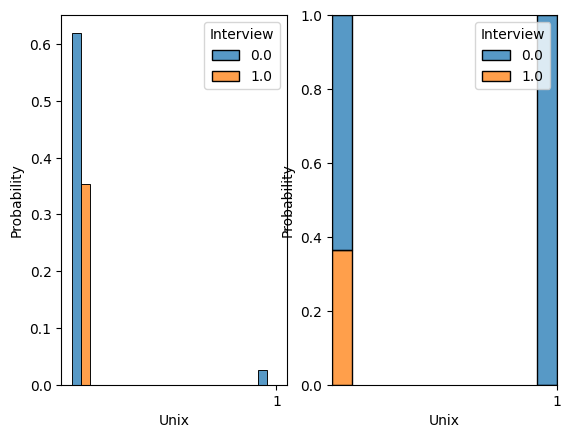

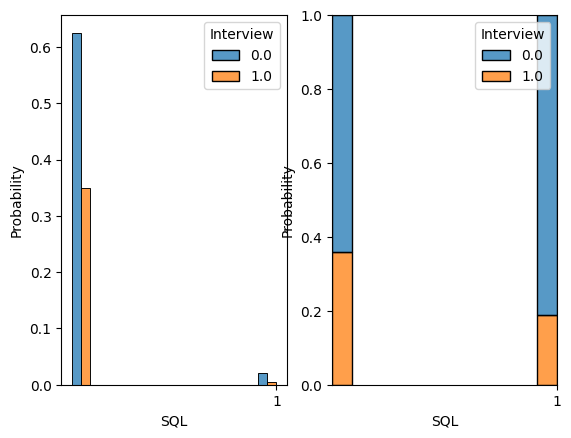

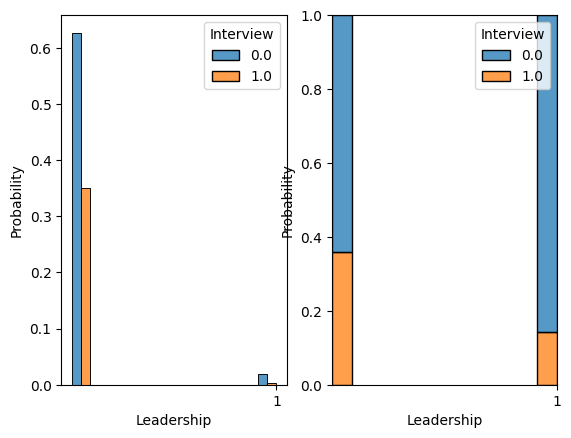

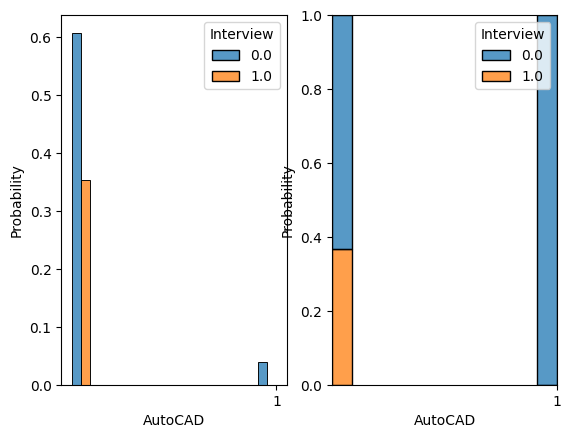

In [10]:
# For the features 'Unix', 'SQL', 'Leadership' and 'AutoCAD'
# create the following diagrams.
# Refer to the previous weeks to see how a seaborn histogram can be adjusted to display those diagrams.

## Preprocessing

In [11]:
# Define a preprocess_inputs function that takes a dataframe and performs the following operations:
# 1. removes the ID column
# 2. Splits the data into target and dependent features.
# 3. Creates a train-test split, keeping 30% of the data for testing.
# 4. Scales the data to be normally distributed between -1 and 1.

In [12]:
# Call the function on the dataframe. Print X_train.

,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,Automotive,...,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
266,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,1.237806,-1.025735,-0.983962,1.044886
309,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,1.237806,0.974910,1.016299,1.044886
484,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,-0.807881,-1.025735,-0.983962,-0.957042
96,-0.118539,-0.161451,2.832108,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,1.237806,0.974910,1.016299,1.044886
69,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,1.237806,0.974910,1.016299,1.044886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,4.946776,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,-0.807881,-1.025735,-0.983962,-0.957042
604,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,7.801099,5.105144,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,5.278889,-0.807881,0.974910,1.016299,1.044886
130,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,-0.807881,0.974910,1.016299,1.044886
195,-0.118539,-0.161451,-0.353094,-0.175933,-0.096561,-0.195881,-0.128187,-0.195881,-0.175933,-0.202152,...,-0.16883,-0.182792,-0.214228,-0.16883,-0.161451,-0.189434,-0.807881,-1.025735,-0.983962,-0.957042


In [ ]:
# Display summary statistics about X_train.

,count,mean,std,min,25%,50%,75%,max
Adobe Illustrator,433.0,-2.871709e-17,1.001157,-0.137199,-0.137199,-0.137199,-0.137199,7.288690
Adobe Photoshop,433.0,-2.666586e-17,1.001157,-0.182792,-0.182792,-0.182792,-0.182792,5.470701
Agile Methodologies,433.0,4.102441e-18,1.001157,-0.361315,-0.361315,-0.361315,-0.361315,2.767671
Analytical Skills,433.0,1.640976e-17,1.001157,-0.175933,-0.175933,-0.175933,-0.175933,5.683986
Art,433.0,-4.102441e-17,1.001157,-0.118539,-0.118539,-0.118539,-0.118539,8.436034
...,...,...,...,...,...,...,...,...
Writing,433.0,-8.204881e-18,1.001157,-0.182792,-0.182792,-0.182792,-0.182792,5.470701
Veteran,433.0,-1.025610e-17,1.001157,-0.803982,-0.803982,-0.803982,1.243808,1.243808
Female,433.0,8.204881e-18,1.001157,-0.993095,-0.993095,-0.993095,1.006953,1.006953
URM,433.0,-8.204881e-18,1.001157,-0.935125,-0.935125,-0.935125,1.069376,1.069376


In [14]:
# How does the distribution of the training labels look like?

Interview
0.0    285
1.0    148
Name: count, dtype: int64

## Model building without dimensionality reduction

In [15]:
# Create a dictionary called "models" mapping strings to models (instance of sklearn classes).
# Use the following models:
# '      Logistic Regression'
# ' Decision Tree Classifier'
# ' Random Forest Classifier'
# 'Support Vector Classifier' <- ensure that the "probability" parameter is set to True.

In [16]:
# Train all the models in the dictionary.

      Logistic Regression trained!
 Decision Tree Classifier trained!
 Random Forest Classifier trained!
Support Vector Classifier trained!


In [17]:
# Print the accuracy, loss and f1 score of the models.

      Logistic Regression | accuracy: 0.9731 | log loss: 0.0687 | f1: 0.9655
 Decision Tree Classifier | accuracy: 0.8333 | log loss: 6.0073 | f1: 0.7891
 Random Forest Classifier | accuracy: 0.9194 | log loss: 0.3040 | f1: 0.8921
Support Vector Classifier | accuracy: 0.9731 | log loss: 0.0859 | f1: 0.9645


## Model building with dimensionality reduction

- Using all features and just switching the perspective

In [18]:
# Use the PCA class from sklearn with n_components equal to 222 and apply it on the feature matrices.

In [19]:
# Plot X_train_reduced.

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 213,PC 214,PC 215,PC 216,PC 217,PC 218,PC 219,PC 220,PC 221,PC 222
266,2.165513,-2.047080,0.779842,-0.468629,-0.410504,0.326729,-0.330425,1.188089,0.181119,0.339906,...,-0.076856,-0.127022,0.595139,0.023213,-0.133908,0.195933,0.014613,-0.226704,0.201940,-0.206260
309,2.645156,-0.097317,-1.509582,1.664764,-1.380994,-1.430427,0.113774,-0.293419,-0.950555,-0.379860,...,0.015262,0.105188,-0.452984,-0.132133,-0.434309,-0.159809,-0.010553,0.228542,-0.158749,0.159289
484,-2.520834,-2.036644,-5.454610,0.534590,-3.722856,5.487656,1.891913,-1.425879,0.222178,-3.657494,...,-0.190849,0.091601,0.202468,-0.294194,0.345946,0.103566,0.408069,0.165560,0.104047,0.073588
96,3.679635,-1.031669,-1.074295,0.241451,-0.192407,-0.433829,-0.846154,-0.662707,-0.169057,-1.047600,...,-0.272583,0.134919,0.573505,0.005708,-0.479583,0.176849,0.475208,-0.444322,0.044207,-0.171834
69,0.625379,1.397218,1.809933,-1.194482,-1.265501,0.111974,0.580013,0.524640,-0.317081,-0.044587,...,0.406605,0.268183,-0.031178,0.087972,0.193006,0.118795,0.619745,0.447999,-0.520444,0.017247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-3.938087,0.414111,0.304383,4.355852,-1.320101,-1.606880,-1.881384,-1.660012,-0.073723,-1.127938,...,-0.145292,0.203521,0.439558,0.211650,0.330697,-0.349298,0.141138,-0.208662,0.513635,-0.018640
604,-1.975482,6.860970,-0.224660,-1.122535,1.205570,-0.983361,4.026020,2.471663,2.851758,-1.044924,...,-0.039806,0.266049,-0.163036,-0.161176,-0.085165,-0.075679,-0.302860,-0.432042,0.043825,-0.016878
130,0.290553,4.638230,0.049148,0.668745,0.209248,-1.400440,0.397882,0.773029,0.673029,-1.527130,...,-0.393919,-0.311468,-0.175344,-0.009965,-0.582000,0.301623,0.017692,0.016800,0.388157,0.232752
195,-2.457984,-1.164480,-0.086209,2.154900,1.481386,-3.130118,0.927036,2.245051,2.868071,0.516132,...,0.795141,0.486525,0.174625,-0.700809,-0.210489,-0.530286,-0.142479,0.155104,0.094093,0.161902


Notice how most of the variance is contained in the first few principle components.

In [20]:
# Display the "explained_variance_" values of the fitted PCA object.
# Notice that they are sorted. The first feature explains most of the variance in the data.

array([4.44480628, 3.05288465, 2.81822454, 2.75749973, 2.7506735 ,
       2.69497394, 2.61285503, 2.5974105 , 2.57306414, 2.49099385,
       2.47766059, 2.43815695, 2.42593105, 2.40047678, 2.35851842,
       2.33987705, 2.32688857, 2.29072529, 2.23423208, 2.22650983,
       2.20390944, 2.15339155, 2.14709754, 2.10395891, 2.09249778,
       2.08506154, 2.06090403, 2.04411564, 1.99706664, 1.98284777,
       1.95812243, 1.94298894, 1.92198714, 1.90357432, 1.8685826 ,
       1.86162705, 1.83104641, 1.82247549, 1.79454516, 1.75883855,
       1.74979004, 1.73242969, 1.72784583, 1.66142285, 1.65572904,
       1.64616084, 1.63652023, 1.62101605, 1.5889261 , 1.5854912 ,
       1.56326692, 1.5575822 , 1.53573249, 1.52885555, 1.50116083,
       1.48870992, 1.46555625, 1.45951645, 1.43931606, 1.4308425 ,
       1.42105476, 1.39585551, 1.38027818, 1.36585465, 1.35956712,
       1.34415838, 1.31900948, 1.3057642 , 1.29925082, 1.28765296,
       1.27622128, 1.27019085, 1.26099363, 1.24373672, 1.21667

In [21]:
# Display the "explained_variance_ratio_" of the fitted PCA object.

array([0.01997541, 0.01371997, 0.01266539, 0.01239248, 0.01236181,
       0.01211149, 0.01174244, 0.01167303, 0.01156361, 0.01119478,
       0.01113486, 0.01095732, 0.01090238, 0.01078799, 0.01059942,
       0.01051564, 0.01045727, 0.01029475, 0.01004087, 0.01000616,
       0.00990459, 0.00967756, 0.00964927, 0.0094554 , 0.0094039 ,
       0.00937048, 0.00926191, 0.00918646, 0.00897502, 0.00891112,
       0.0088    , 0.00873199, 0.00863761, 0.00855486, 0.0083976 ,
       0.00836634, 0.00822891, 0.00819039, 0.00806487, 0.0079044 ,
       0.00786373, 0.00778571, 0.00776511, 0.0074666 , 0.00744101,
       0.00739801, 0.00735469, 0.00728501, 0.0071408 , 0.00712536,
       0.00702548, 0.00699993, 0.00690174, 0.00687083, 0.00674637,
       0.00669041, 0.00658636, 0.00655922, 0.00646843, 0.00643035,
       0.00638636, 0.00627312, 0.00620311, 0.00613829, 0.00611003,
       0.00604078, 0.00592776, 0.00586824, 0.00583897, 0.00578684,
       0.00573547, 0.00570837, 0.00566703, 0.00558948, 0.00546

In [22]:
# Recreate and retrain the models on the PCA transformed data. Measure their performance and loss.
# Are the models better?

      Logistic Regression trained!
 Decision Tree Classifier trained!
 Random Forest Classifier trained!
Support Vector Classifier trained!
      Logistic Regression | accuracy: 0.9731 | log loss:  0.0687 | f1: 0.9655
 Decision Tree Classifier | accuracy: 0.9247 | log loss:  2.7130 | f1: 0.9041
 Random Forest Classifier | accuracy: 0.9516 | log loss:  0.4007 | f1: 0.9353
Support Vector Classifier | accuracy: 0.9731 | log loss:  0.0836 | f1: 0.9645


The idea now is to drop all columns with little variance and hold on to the first few, as they hold the most amount of information.

In [23]:
# Now use PCA to leave only 2 features (n_components equal to 2).
# Recreate and retrain the models on the PCA transformed data with only 2 features. Measure their performance and loss.
# Are the models better?

      Logistic Regression trained!
 Decision Tree Classifier trained!
 Random Forest Classifier trained!
Support Vector Classifier trained!
      Logistic Regression | accuracy: 0.9731 | log loss:  0.0775 | f1: 0.9640
 Decision Tree Classifier | accuracy: 0.9462 | log loss:  1.9378 | f1: 0.9296
 Random Forest Classifier | accuracy: 0.9731 | log loss:  0.0803 | f1: 0.9640
Support Vector Classifier | accuracy: 0.9785 | log loss:  0.0614 | f1: 0.9714


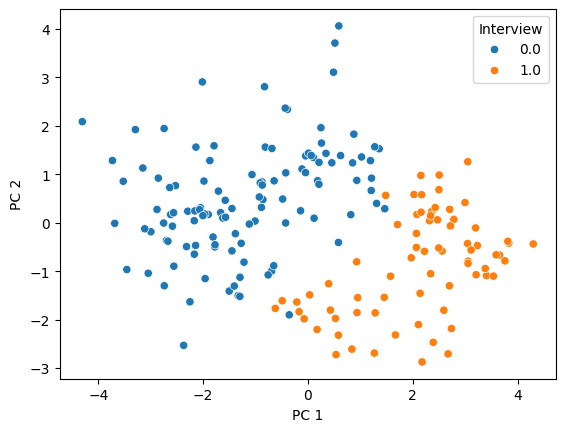

In [24]:
# Plot the PCA features against the truth label for the test data.

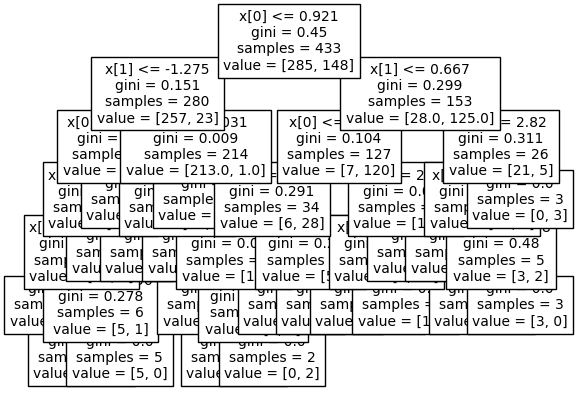

In [25]:
# Plot the obtained decision tree using the plot_tree function from sklearn.